# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.initializers import glorot_uniform
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Background

_Credit default_ can defined as the failure to repay a debt including interest or principal on a loan or security on the due date.This can cause losses for lenders so that preventive measures is a must, in which early detection for potential default can be one of those. This case study can be categorized as the binary classification.

Artifical Neural Network (ANN) is one of models for classification problems, having the ability to capture the linier and also the non-linear model trends from data so that it can give predictions for the new data (having the same distributions).

In jupyter notebook, the effectiveness of ANN model will be tried to classify the _credit default customer_ and hope that it can reach 95% accuracy.

# Data Understanding

The data used in this task is a public dataset from UCI Machine Learning entitled "Default of Credit Card Clients Dataset" containing information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

This dataset contains 30,000 data observations with 25 variables consisting of 1 ID, 23 predictor variables, and 1 response variable as the default payment next month.

Here are some samples of the data.

In [3]:
df = pd.read_csv('uci_credit_card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


The description of each column/variable can be seen below :
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## Data Exploratory
As we can see the description of each column/variable, those are the numerical data so that the data summary are all based on basic statistics in mean, median, minimum and maximum etc which detailed below.

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Next, we want see the correlation between all of features and label in the dataset by using the Pearson correlation formula below. <br>
$$Covarian (S_{xy}) =\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1}$$


The plot below is the correlation between all features (predictor variables) toward label.

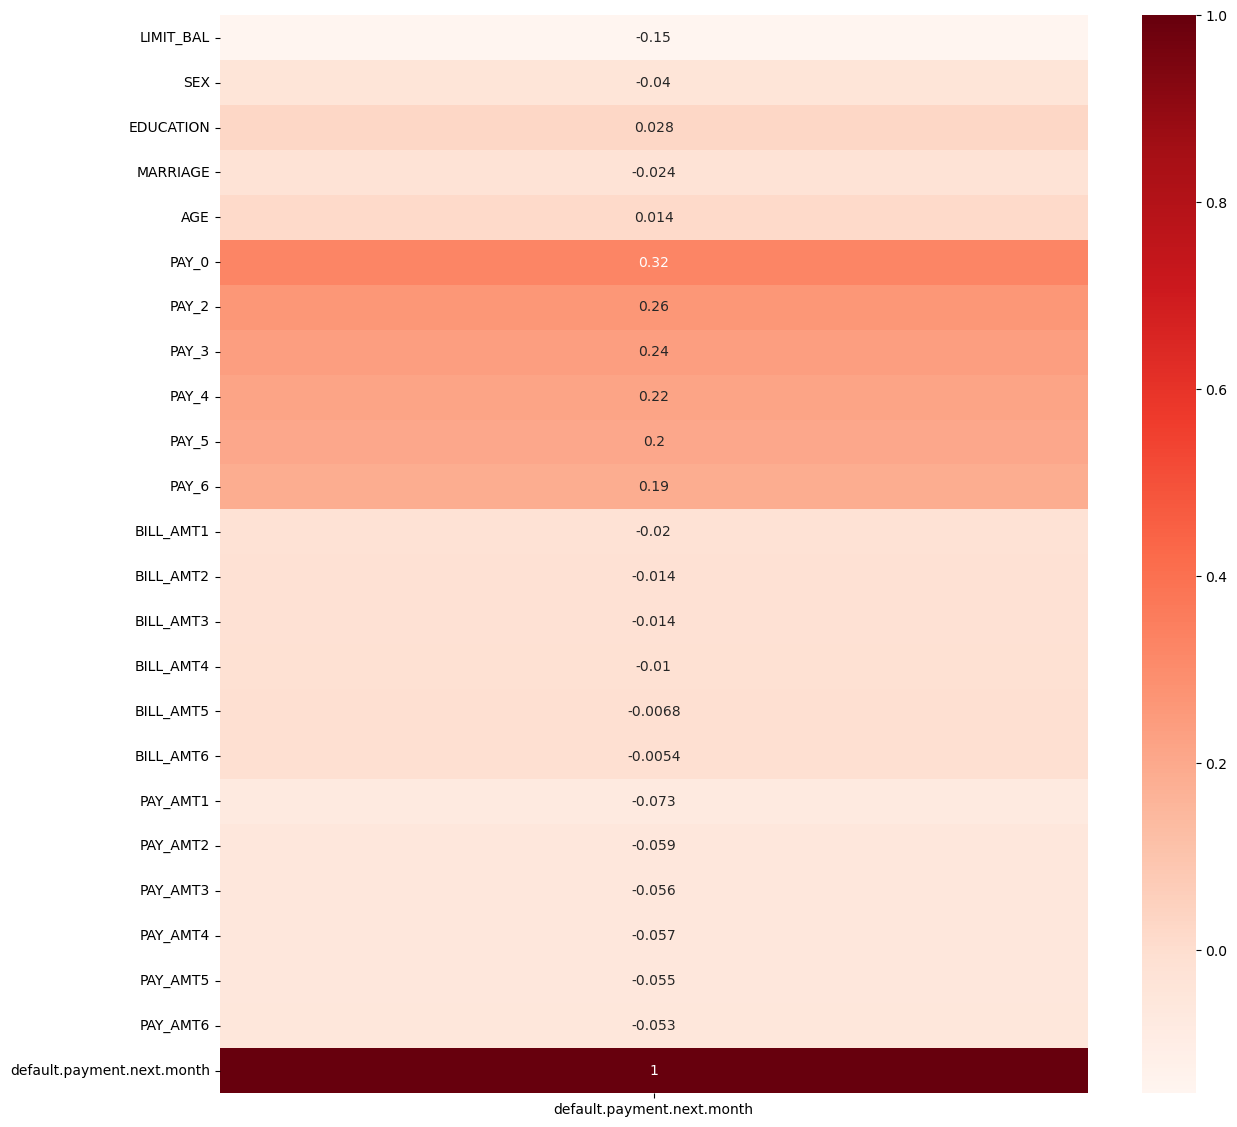

In [6]:
# Using Pearson Correlation
plt.figure(figsize=(14,14))
cor = df.iloc[:,1:].corr()
x = cor [['default.payment.next.month']]
sns.heatmap(x, annot=True, cmap=plt.cm.Reds)
plt.show()

As we can see in the plot above, the repayment status of customers (PAY_0 - PAY_6) have the higher correlation towards the label (default.payment.next.month) in compared to other features.

# Data Preparation
## Data Cleansing
Before implementing the ANN to predict the "credit default customer", we have to check the data, whether it needs cleaning or not.

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

After checking the summary of missing value in the dataset, the result shows that the data has no missing values so that the data is ready to the next stage.

## Splitting Data to Training and Test Data
In this stage, the clean data will be splitted into 2 categories, train data and test data. The train data will be utilized in the training ANN model, and the data test will be used to test the trained model whether the model has good generalization or not in predicting the future data. In this stage, 80% data will be used as the train data and the rest as the test data.

Before splitting, the dataset will be grouped into 2 variables, the data from 2nd to 24rd column as the predictor features (the first columns is not included as predictor) will be groped as X, and the data from 25th columns (label)  will be renamed as y.

In [8]:
X = df.iloc[:, 1:24].values
y = df.iloc[:, 24].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Data Standardization

After splitting data, the numeric data will be standardized by scaling the data to have mean of 0 and variance of 1. 
$$X_{stand} = \frac{X - \mu}{\sigma}$$

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

On the Modeling phase, we create the ANN model with 5 hidden layer (with 50,40,30,20, and 10 neurons respectively) with _relu_ activation function, and 1 output layer with 1 neuron with _sigmoid_ activation function. Furthermore, we choose the 'Adam' optimizer to optimize the parameter in the created model.

In [14]:
hl   = 5                    # number of hidden layer
nohl = [50,40,30,20,10]     # number of neurons in each hidden layer
classifier = Sequential()

# Hidden Layer
for i in range(hl):
    if i==0:
        classifier.add(Dense(units=nohl[i], input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    else :
        classifier.add(Dense(units=nohl[i], kernel_initializer=glorot_uniform(seed=0), activation='relu'))

# Output Layer
classifier.add(Dense(units=1, kernel_initializer=glorot_uniform(seed=0), activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Here below the summary of created model architecture by ANN with the parameters needed.

In [15]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                1200      
_________________________________________________________________
dense_7 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 5,311
Trainable params: 5,311
Non-trainable params: 0
____________________________________________________

After create the model architecture by ANN, we train the model by a certain number of epoch and batch.

In [16]:
history = classifier.fit(X_train, y_train, epochs=100, batch_size=512,)

Epoch 1/100
47/47 [==============================] - 1s 5ms/step - loss: 0.6269 - accuracy: 0.7579
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.8080
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8138
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.8154
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.8165
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8168
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8178
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8179
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8186
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8200
Epoch 11/

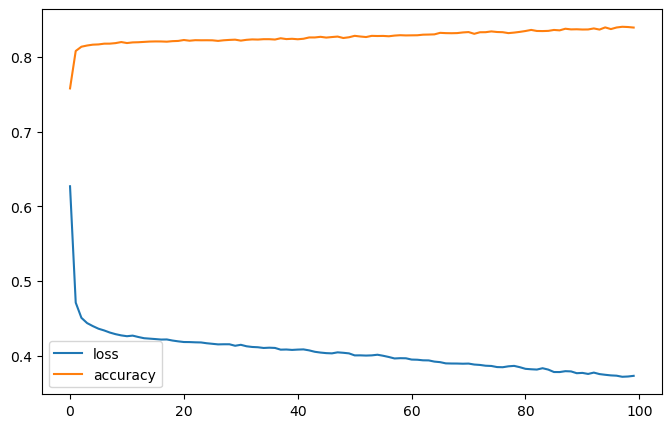

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Evaluation
In this classification problem, we evaluate model by looking at how many of their predictions are correct in which the threshold is 50%. This can be plotted into Confusion Matrix.

Here is the confusion matrix from the ANN model after doing prediction to the dataset :

In [11]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
conf_matr = confusion_matrix(y_test, y_pred)

TP = conf_matr[0,0]; FP = conf_matr[0,1]; TN = conf_matr[1,1]; FN = conf_matr[1,0]
print('Confusion Matrix : ')
print(conf_matr)
print()
print('True Positive (TP)  : ',TP)
print('False Positive (FP) : ',FP)
print('True Negative (TN)  : ',TN)
print('False Negative (FN) : ',FN)

Confusion Matrix : 
[[4254  449]
 [ 761  536]]

True Positive (TP)  :  4254
False Positive (FP) :  449
True Negative (TN)  :  536
False Negative (FN) :  761


in which 
- True Positive (TP) means the model predict customer will pay the credit and the prediction is correct.
- False Positive (FP) means the model predict customer will will pay the credit and the prediction is incorrect.
- True Negative (TN) means the model predict customer will not will pay the credit and the prediction is correct.
- False Negative (FN) means the model predict customer will not will pay the credit and the prediction is incorrect.

Based of the result above, then we can start doing evaluation using 3 different metrics: accuracy, recall, and precision.

### Accuracy
Accuracy means how many prediction is true compared to the total data. The metric will be calculated by following formula.

$$Accuray = \frac{TP+TN}{TP+TN+FP+FN}$$

In [12]:
acc = (TP+TN)/(TP+TN+FP+FN)
print('By this metric, only '+ str(round(acc*100)) + '% of them are correctly predicted.')

By this metric, only 80% of them are correctly predicted.


### Precision
In this metric (precision), it only concern on how many positive prediction that are actually correct and this will be calculated by formula below.
 
$$Precision = \frac{TP}{TP+FP}$$

In [13]:
pre = TP/(TP+FP)
print('From those classification result, by calculating the precision, there are '+ str(round(pre*100)) + '% of them who are actually pay the credit.')

From those classification result, by calculating the precision, there are 90% of them who are actually pay the credit.


After reviewing the model performance by the accurary and precision metric, it seems that the created model included the hyper-parameter used  has not be able the reach the 95% accuray so that there are some possible actions which can be taken, such as :
- tuning the hyper-parameter tp get the better performance before releasing the model into the real use
- release the model while also developing a better model
- trying another classfication model (such as decision-tree, Naive-bayes)